In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [ ]:
# Carregando o arquivo de áudio
fs, data = wavfile.read('audioA.wav')

# Usando apenas o primeiro canal (estéreo)
first_channel = data[:, 0]

Questão 1

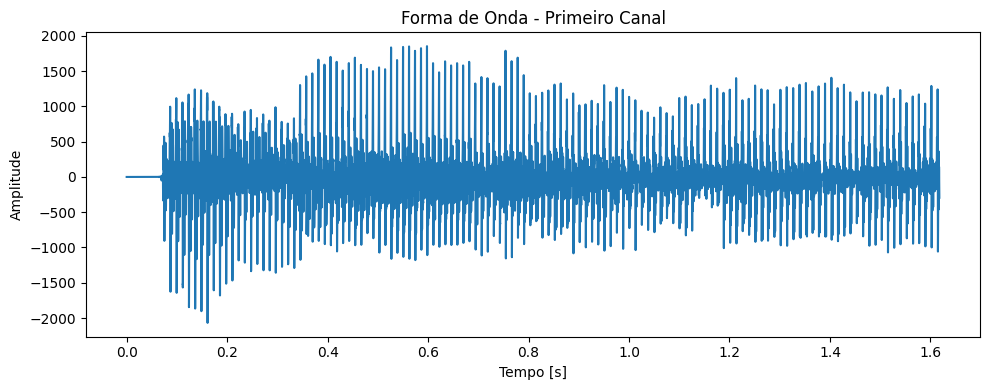

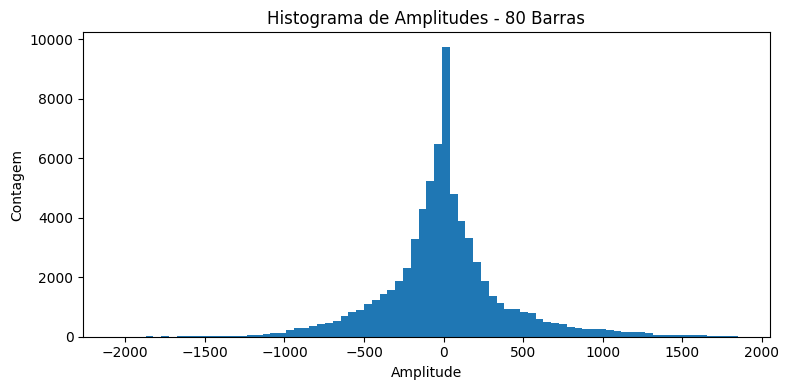

In [ ]:
# Gerando eixo de tempo para o gráfico de forma de onda
time = np.arange(first_channel.shape[0]) / fs

# Plot da forma de onda
plt.figure(figsize=(10, 4))
plt.plot(time, first_channel)
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.title('Forma de Onda - Primeiro Canal')
plt.tight_layout()
plt.show()

# Plot do histograma com 80 barras
plt.figure(figsize=(8, 4))
plt.hist(first_channel, bins=80)
plt.xlabel('Amplitude')
plt.ylabel('Contagem')
plt.title('Histograma de Amplitudes - 80 Barras')
plt.tight_layout()
plt.show()

Questão 2

In [ ]:
# Média e desvio padrão do sinal
media = np.mean(first_channel)
desvio_padrao = np.std(first_channel)

# Número de amostras
n = len(first_channel)

# Assimetria manual (skewness)
assimetria = (np.sum(((first_channel - media) / desvio_padrao) ** 3)) / n

# Curtose manual (kurtosis, com correção de Fisher, subtraindo 3)
curtose = ((np.sum(((first_channel - media) / desvio_padrao) ** 4)) / n) - 3

assimetria, curtose

(0.4312721153267144, 2.998345446907683)

Assimetria ≈ 0.43: Embora o sinal seja de uma vogal repetida, pequenas assimetrias são naturais devido à forma como a voz humana é produzida — especialmente se a pessoa não manteve exatamente a mesma intensidade ao longo do tempo. A leve assimetria positiva sugere que os picos positivos foram um pouco mais intensos ou frequentes.

Curtose ≈ 3.0: Muito próximo da curtose de uma distribuição normal. Isso faz sentido: a forma de onda da voz tem uma variação contínua e natural, sem muitos picos extremos (como explosões sonoras ou silêncio total), resultando em uma densidade de probabilidade suave.

Conclusão: Os valores de assimetria e curtose estão de acordo com o tipo de sinal analisado — uma vogal sustentada repetidamente — e são perfeitamente plausíveis para esse tipo de conteúdo.

In [ ]:
# Dividindo o sinal em 10 partes com aproximadamente 7.100 amostras cada
part_size = len(first_channel) // 10
segments = [first_channel[i*part_size:(i+1)*part_size] for i in range(10)]

Questão 3

In [ ]:

# Calculando a média temporal de cada parte
means = [np.mean(seg) for seg in segments]

# Imprimindo as médias
print("Médias temporais por segmento:")
for i, m in enumerate(means, 1):
    print(f"Segmento {i}: Média = {m:.4f}")
mean_variation = np.std(means)
print(f"\nDesvio padrão entre as médias: {mean_variation:.6f}")

Médias temporais por segmento:
Segmento 1: Média = -0.9425
Segmento 2: Média = 0.1351
Segmento 3: Média = -1.9662
Segmento 4: Média = 4.5629
Segmento 5: Média = -2.4912
Segmento 6: Média = -5.8869
Segmento 7: Média = 3.6967
Segmento 8: Média = 21.0199
Segmento 9: Média = 2.4139
Segmento 10: Média = -0.9100

Desvio padrão entre as médias: 7.000504


A média do sinal varia significativamente ao longo do tempo, indicando que o áudio não é estacionário. Essa variação revela mudanças sutis que não são visíveis na forma de onda, mas que refletem:

- Possíveis componentes de baixa frequência,
- Flutuações fisiológicas na produção da voz (como respiração ou pressão de ar),
- Movimentos do falante em relação ao microfone,
- Características do equipamento de gravação.

Mesmo um som aparentemente constante, como uma vogal prolongada, pode conter essas variações internas. Isso mostra a importância de usar análises estatísticas para entender melhor a estrutura real do sinal.



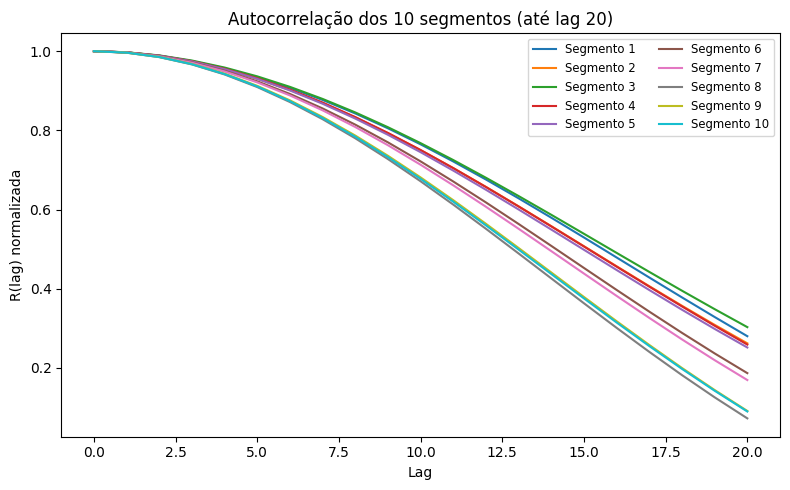

Valores de autocorrelação em alguns lags:
Seg 1: lag0=1.000, lag5=0.934, lag10=0.765, lag20=0.280
Seg 2: lag0=1.000, lag5=0.931, lag10=0.750, lag20=0.262
Seg 3: lag0=1.000, lag5=0.936, lag10=0.768, lag20=0.303
Seg 4: lag0=1.000, lag5=0.932, lag10=0.750, lag20=0.259
Seg 5: lag0=1.000, lag5=0.930, lag10=0.745, lag20=0.251
Seg 6: lag0=1.000, lag5=0.924, lag10=0.722, lag20=0.187
Seg 7: lag0=1.000, lag5=0.921, lag10=0.713, lag20=0.169
Seg 8: lag0=1.000, lag5=0.909, lag10=0.671, lag20=0.072
Seg 9: lag0=1.000, lag5=0.912, lag10=0.681, lag20=0.091
Seg 10: lag0=1.000, lag5=0.911, lag10=0.677, lag20=0.090


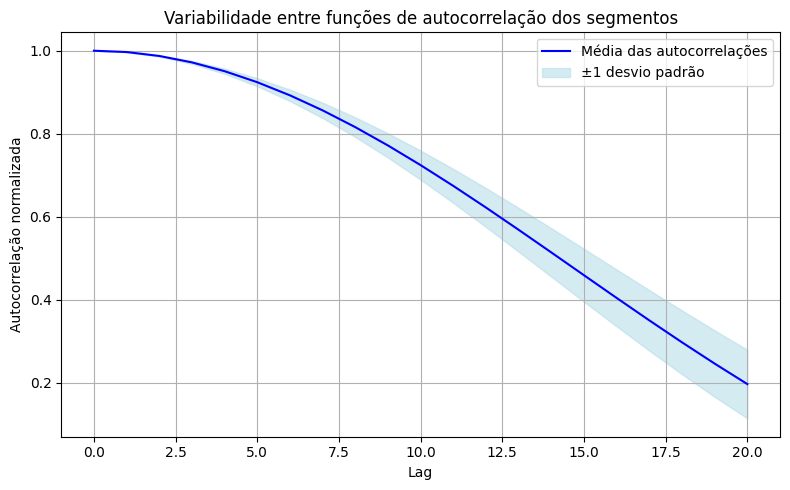

In [ ]:
# Número de lags
max_lag = 20

# Função para autocorrelação normalizada
def autocorr(x, nlags):
    x = x - np.mean(x)
    result = [np.dot(x, x)]  # lag = 0
    for lag in range(1, nlags+1):
        result.append(np.dot(x[:-lag], x[lag:]))
    return np.array(result) / result[0]  # normaliza pela energia total

# Calcular e plotar autocorrelações
plt.figure(figsize=(8, 5))
for idx, seg in enumerate(segments, 1):
    r = autocorr(seg, max_lag)
    plt.plot(range(max_lag+1), r, label=f'Segmento {idx}')
plt.xlabel('Lag')
plt.ylabel('R(lag) normalizada')
plt.title('Autocorrelação dos 10 segmentos (até lag 20)')
plt.legend(ncol=2, fontsize='small')
plt.tight_layout()
plt.show()

# Imprimir algumas autocorrelações (exemplo: lags 0, 5, 10, 20)
print("Valores de autocorrelação em alguns lags:")
for idx, seg in enumerate(segments, 1):
    r = autocorr(seg, max_lag)
    print(f"Seg {idx}: lag0={r[0]:.3f}, lag5={r[5]:.3f}, lag10={r[10]:.3f}, lag20={r[20]:.3f}")

autocorrs = np.array([autocorr(seg, max_lag) for seg in segments])

# Média e desvio padrão por lag
mean_autocorr = np.mean(autocorrs, axis=0)
std_autocorr = np.std(autocorrs, axis=0)

# Plotar média com faixa de ±1 desvio padrão
lags = np.arange(max_lag+1)
plt.figure(figsize=(8, 5))
plt.plot(lags, mean_autocorr, label='Média das autocorrelações', color='blue')
plt.fill_between(lags,
                 mean_autocorr - std_autocorr,
                 mean_autocorr + std_autocorr,
                 color='lightblue', alpha=0.5, label='±1 desvio padrão')
plt.xlabel('Lag')
plt.ylabel('Autocorrelação normalizada')
plt.title('Variabilidade entre funções de autocorrelação dos segmentos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


A função de autocorrelação normalizada de cada segmento mostra um padrão muito semelhante em todas as 10 partes:
 - o pico principal em lag 0 e a queda gradual com oscilações periódicas refletindo o caráter tonal do sinal.
 
Portanto, a autocorrelação é aproximadamente a mesma
para todas as partes, indicando consistência na estrutura temporal repetitiva do áudio.

Questão 5

Com base nas análises feitas nas questões anteriores:

- **Na questão 3**, observamos que a **média temporal** do sinal varia consideravelmente entre os 10 segmentos (com desvio padrão notável). Essa variação evidencia que o **primeiro momento estatístico** do sinal **não é constante no tempo**.
  
- **Na questão 4**, entretanto, a **função de autocorrelação** (segundo momento central) se manteve **consistente entre os segmentos**, com formas muito similares e baixa variabilidade entre elas — indicando **invariância temporal da estrutura de segunda ordem** do sinal.

## Conclusão

Para que um sinal seja considerado **estacionário no sentido amplo** (ou "estacionariedade de segunda ordem"), duas condições devem ser satisfeitas:

1. A **média** do sinal deve ser constante ao longo do tempo.
2. A **autocorrelação** deve depender apenas do atraso (lag), e não do tempo absoluto.

Embora a segunda condição tenha sido atendida, a primeira foi violada. Portanto, o sinal analisado **não é estacionário no sentido amplo**. Ele apresenta propriedades **não estacionárias**, especialmente evidentes na variação da média entre os segmentos.

Essa análise mostra a importância de avaliar **múltiplos aspectos estatísticos** para caracterizar sinais temporais de forma rigorosa.

